In [3]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import glob

/opt/miniconda3/envs/CondaEnv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'

In [69]:
import tensorflow as tf
os.getcwd()

'/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project'

In [4]:
df=pd.read_csv('Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
audio_recording1="/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/genres_original/country/country.00007.wav"
audio_recording2="/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/genres_original/country/country.00007.wav"

data , sr=librosa.load(audio_recording1)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


/opt/miniconda3/envs/CondaEnv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


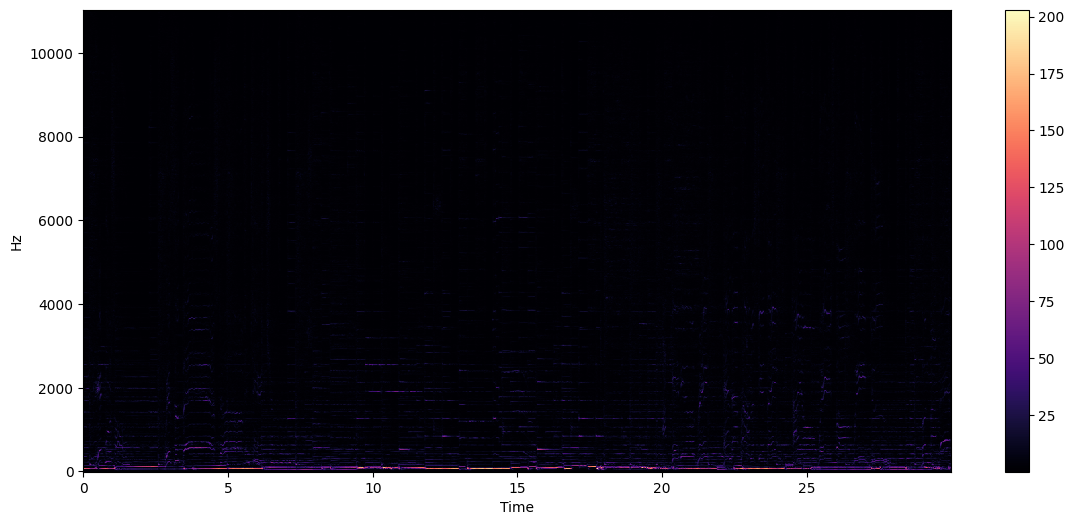

In [7]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

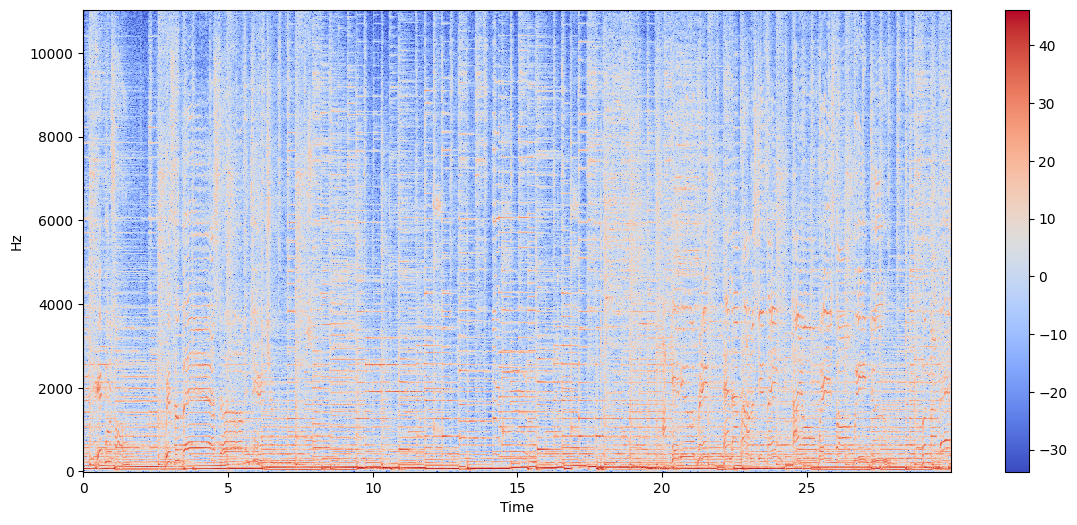

In [8]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

In [11]:
image_path = '/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original'

In [62]:
y = []
total_labels = os.listdir(image_path)

In [64]:
total_labels[]

['pop',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 'country',
 'jazz']

In [65]:
image_path = '/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original'

for root, dirs, files in os.walk(image_path):
    for file in files:
        if file.endswith('.png'):
            print(os.path.join(root, file))
            img = Image.open(os.path.join(root, file)).convert('RGB')
            np_img = np.array(img)
            np_img = np.expand_dims(np_img, axis=0)
            genre = [i for i in range(len(total_labels)) if total_labels[i] in os.path.join(root, file)]
            print(genre)

/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00022.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00036.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00037.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00023.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00035.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_Project/Data/images_original/pop/pop00021.png
[0]
/Users/panayotistheodoropoulos/Documents/CODING/Code_for_classes/Statistical_Machine_Learning/Final_

In [2]:
draw_path = 'Data/genres_original'
import librosa

def make_images(draw_path, store_path):
    for root, dirs, files in os.walk(draw_path):
        for file in files:
            if file.endswith('.wav'):
                y, sr = librosa.load(os.path.join(root, file))

make_images(draw_path, 'Final_Project/Data/new_images')

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'

In [1]:
import librosa

/opt/miniconda3/envs/CondaEnv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'